# Final Project:
## The Best Neighborhood In Pittsburgh

### Introduction
In this lab, we are going to talk about the the "best" neighborhood in Pittsburgh. We are going to consider the convienence in the neighborhood, safety, and parking. We came up with these because the "best" neighborhood would be convenient to the citizens, be a safe place to live and have parking for the people who live there.

### The Metric 
* **Traffic**
* **Safety**
* **Transportation(Convenience)**
* **Air Quality**
    
**Places:**
   * Shady Side
   * Oakland
   * Downtown

## Satety
*This table is the number of firearms seized by Pittsburgh police in each neighborhood.
https://data.wprdc.org/dataset/pbp-fire-arm-seizures*

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mat
import seaborn as sns        
import matplotlib.pyplot as plt
firearm = pd.read_csv("firearm.csv")
firearm.head()

address  total_count  other_count  \
0   1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210            2            0   
1     BREVET WAY & MINTON ST PITTSBURGH, PA 15204            1            0   
2  TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213            1            0   
3      3500 BLOCK GERBER AVE PITTSBURGH, PA 15212            1            0   
4        7500 BLOCK KELLY ST PITTSBURGH, PA 15208            1            0   

   pistol_count  revolver_count  rifle_count  shotgun_count  year  month  dow  \
0             1               1            0              0  2015      1    0   
1             1               0            0              0  2015      1    0   
2             1               0            0              0  2015      1    0   
3             1               0            0              0  2015      1    0   
4             1               0            0              0  2015      1    0   

           neighborhood  council_district  ward         tract  \
0  Mount Oliver Borough               3.0   0.0  4.200317e+10   
1              Sheraden               2.0  20.0  4.200356e+10   
2       Terrace Village               6.0   4.0  4.200305e+10   
3      Brighton Heights               1.0  27.0  4.200327e+10   
4                   NaN               NaN   NaN           NaN   

   public_works_division police_zone fire_zone   latitude  longitude  
0                    0.0           3       4-6  40.417619 -79.986436  
1                    5.0           6      1-16  40.456904 -80.052328  
2                    3.0           2      2-10  40.441185 -79.968527  
3                    1.0           1      1-14  40.479530 -80.033477  
4                    NaN           5       NaN        NaN        NaN

In [4]:
df = pd.read_csv(r'firearm.csv',usecols=[10,1])
df.to_csv('totalfirearm.csv')
df

total_count              neighborhood
0               2      Mount Oliver Borough
1               1                  Sheraden
2               1           Terrace Village
3               1          Brighton Heights
4               1                       NaN
...           ...                       ...
4120            1                   Windgap
4121            1  Lincoln-Lemington-Belmar
4122            1            Homewood North
4123            1                   Carrick
4124            1             Highland Park

[4125 rows x 2 columns]

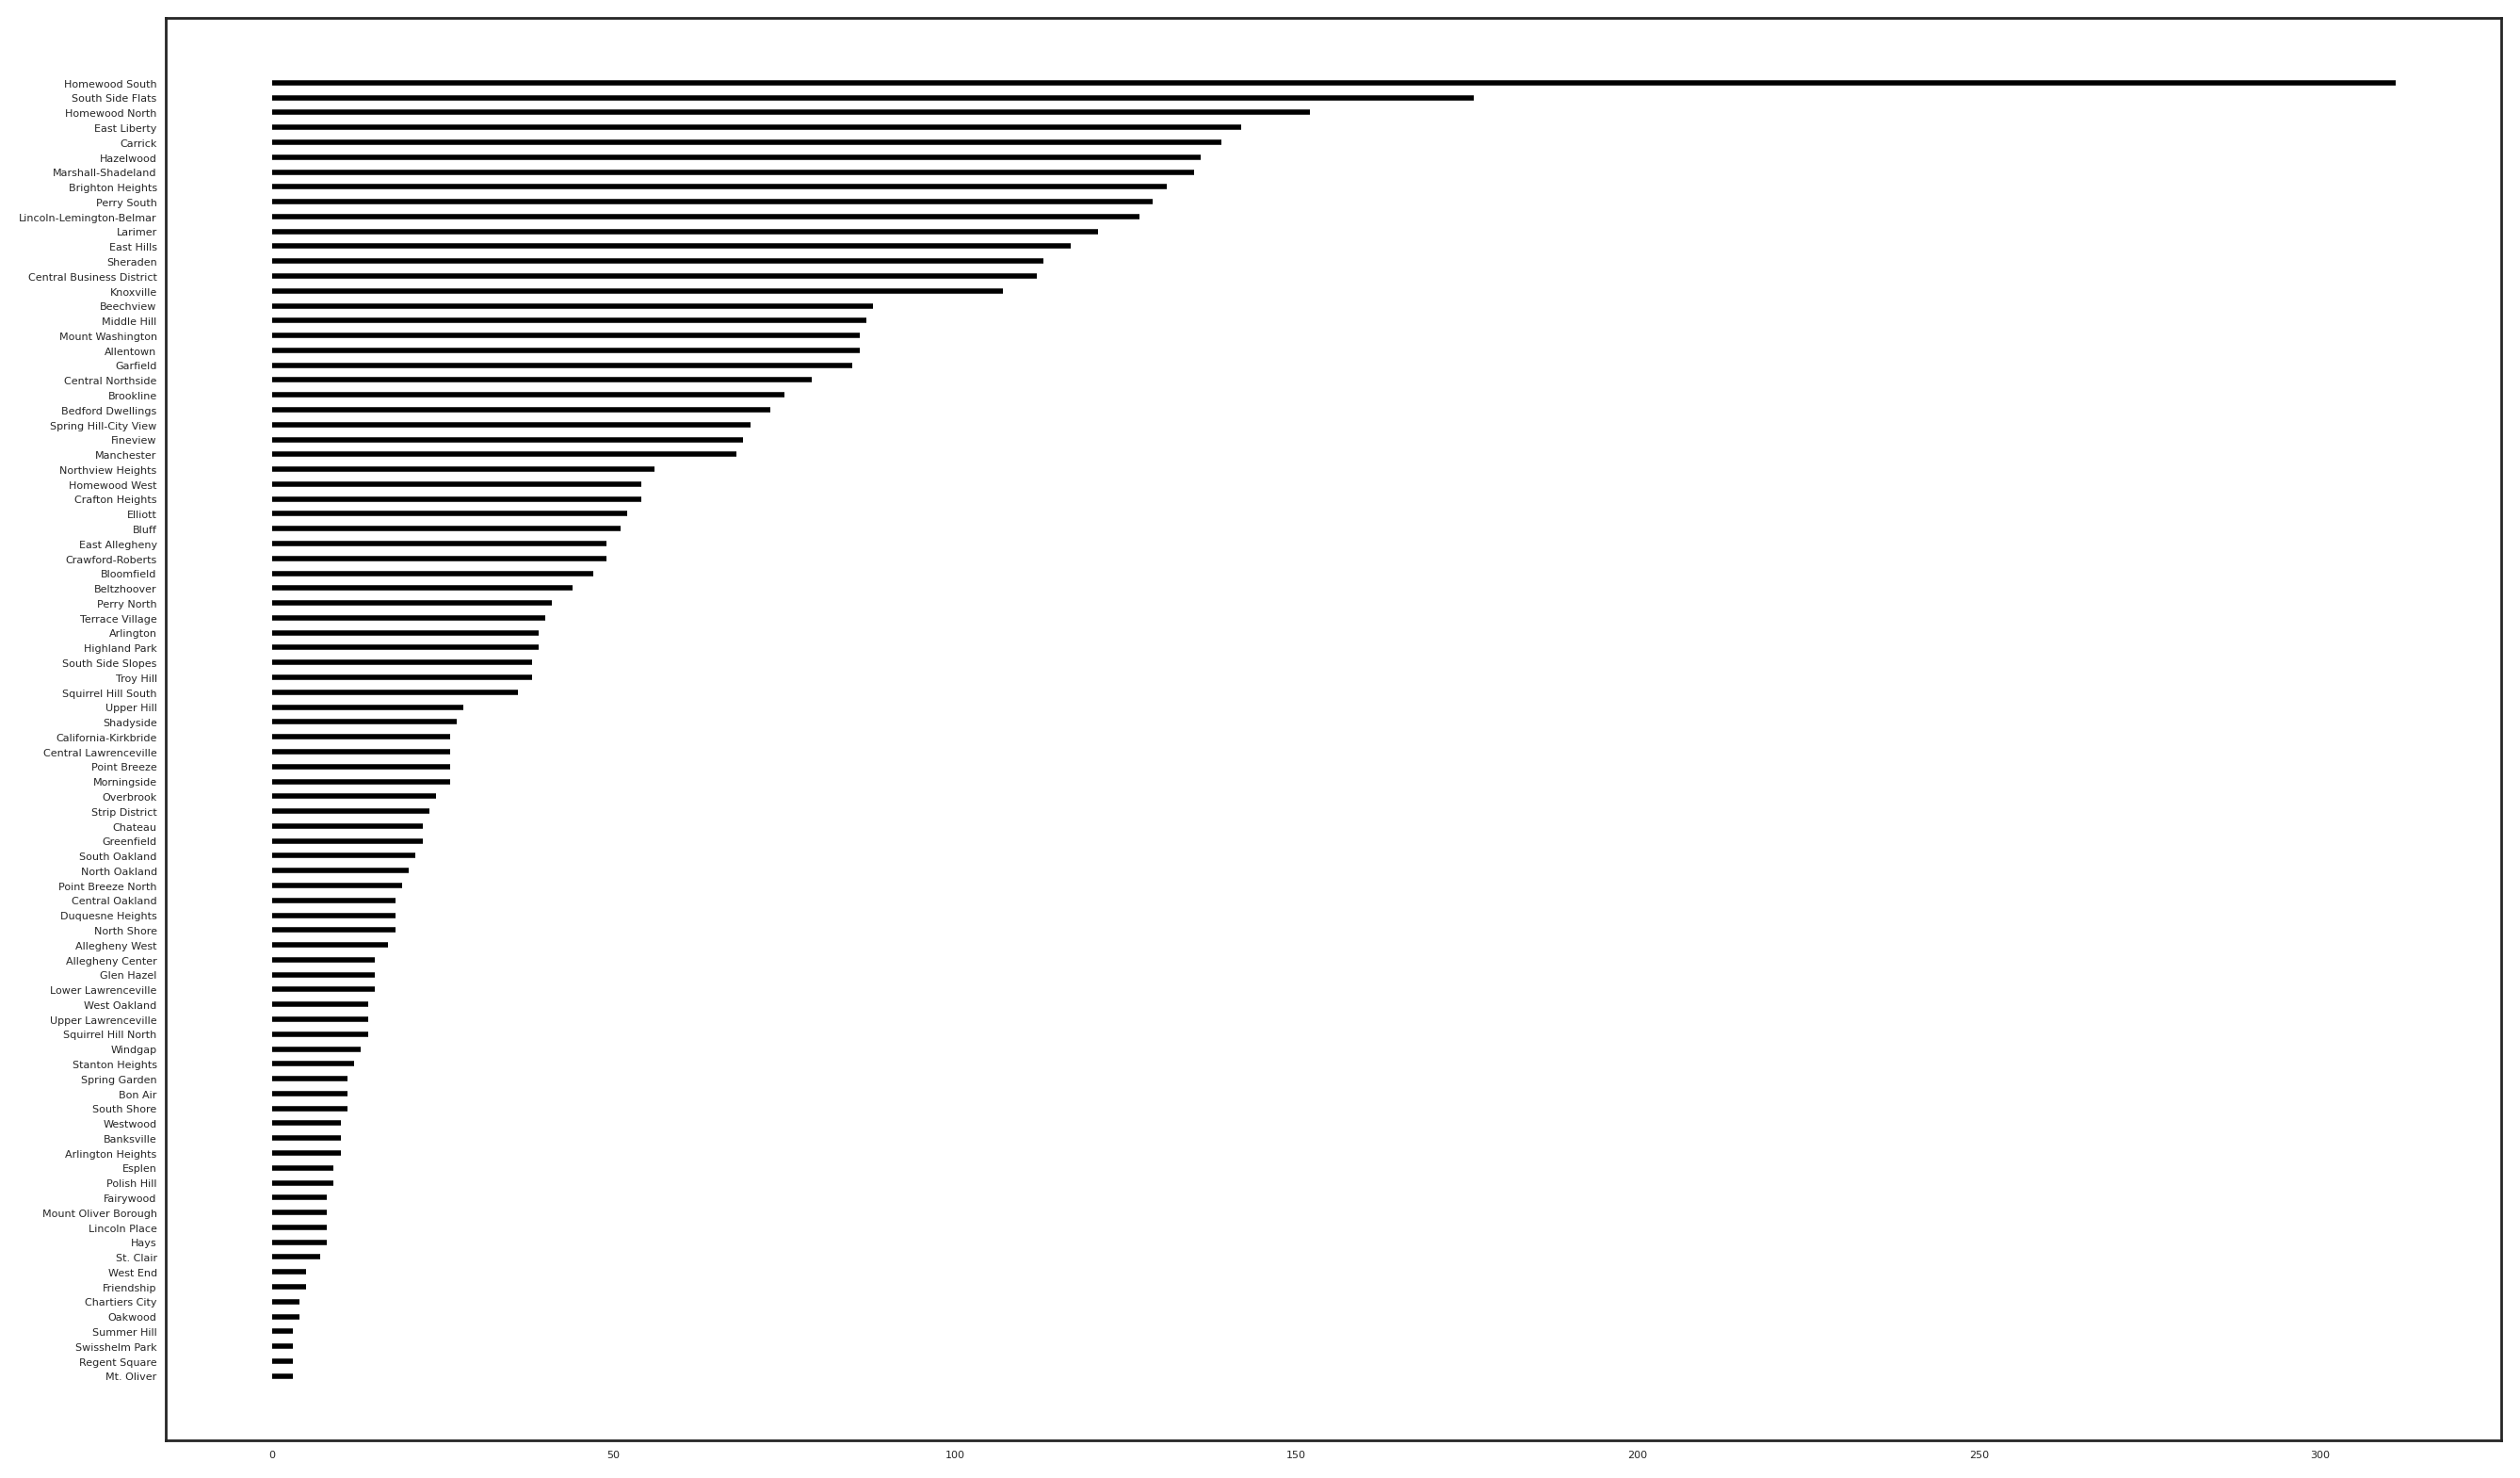

In [116]:
#df2=firearm.groupby("neighborhood")["total_count"].sum()
data = firearm[['total_count', 'neighborhood']].groupby('neighborhood').apply(lambda x:x.sum())
data.sort_values('total_count', inplace = True) 
fig,ax = plt.subplots(figsize = (16, 10),dpi=200)  
ax.hlines(y = data.index,xmin = 0,xmax =data.total_count,linewidth = 2,label='A')      

In [119]:
Min = data['total_count'].sort_values()
Min

neighborhood
Mt. Oliver            3
Regent Square         3
Swisshelm Park        3
Summer Hill           3
Oakwood               4
                   ... 
Carrick             139
East Liberty        142
Homewood North      152
South Side Flats    176
Homewood South      311
Name: total_count, Length: 88, dtype: int64

In [3]:
firearm['neighborhood'].value_counts()

Homewood South      226
South Side Flats    154
Homewood North      124
Carrick             109
Hazelwood           106
                   ... 
Regent Square         3
Mt. Oliver            3
Friendship            3
Summer Hill           2
Swisshelm Park        1
Name: neighborhood, Length: 88, dtype: int64

In [132]:
firearm.loc[(firearm['neighborhood']=='Mt. Oliver')]

address  total_count  \
1383     400 BLOCK MOUNTAIN AVE PITTSBURGH, PA 15210            1   
2188  FISHER ST & RECTENWALD ST PITTSBURGH, PA 15210            1   
3082       WALDE ST & GORGAS ST PITTSBURGH, PA 15210            1   

      other_count  pistol_count  revolver_count  rifle_count  shotgun_count  \
1383            0             0               0            0              1   
2188            0             0               1            0              0   
3082            0             1               0            0              0   

      year  month  dow neighborhood  council_district  ward         tract  \
1383  2017      5    4   Mt. Oliver               3.0  16.0  4.200356e+10   
2188  2018      9    2   Mt. Oliver               3.0  16.0  4.200356e+10   
3082  2020      5    5   Mt. Oliver               3.0  16.0  4.200356e+10   

      public_works_division police_zone fire_zone   latitude  longitude  
1383                    3.0           3       4-8  40.412476 -79.977068  
2188                    3.0           3       4-8  40.411266 -79.979568  
3082                    3.0           3       4-8  40.410502 -79.981090

In [133]:
firearm.loc[(firearm['neighborhood']=="Summer Hill")]

address  total_count  other_count  \
316      400 BLOCK IVORY AVE PITTSBURGH, PA 15214            2            0   
2696  100 BLOCK MONTVILLE ST PITTSBURGH, PA 15214            1            0   

      pistol_count  revolver_count  rifle_count  shotgun_count  year  month  \
316              2               0            0              0  2015      7   
2696             0               0            0              1  2019      8   

      dow neighborhood  council_district  ward         tract  \
316     5  Summer Hill               1.0  26.0  4.200326e+10   
2696    4  Summer Hill               1.0  26.0  4.200326e+10   

      public_works_division police_zone fire_zone   latitude  longitude  
316                     1.0           1      1-15  40.496349 -80.008715  
2696                    1.0           1      1-15  40.498787 -80.017106

In [134]:
firearm.loc[(firearm['neighborhood']=="Regent Square")]

address  total_count  other_count  \
860     600 BLOCK EAST END AVE PITTSBURGH, PA 15221            1            0   
1463  600 BLOCK S BRADDOCK AVE PITTSBURGH, PA 15221            1            0   
2853  900 BLOCK N BRADDOCK AVE PITTSBURGH, PA 15221            1            0   

      pistol_count  revolver_count  rifle_count  shotgun_count  year  month  \
860              0               1            0              0  2016      7   
1463             1               0            0              0  2017      6   
2853             1               0            0              0  2019     11   

      dow   neighborhood  council_district  ward         tract  \
860     6  Regent Square               9.0  14.0  4.200314e+10   
1463    6  Regent Square               5.0  14.0  4.200314e+10   
2853    5  Regent Square               5.0  14.0  4.200314e+10   

      public_works_division police_zone fire_zone   latitude  longitude  
860                     3.0           4      2-16  40.439568 -79.896678  
1463                    3.0           4      3-14  40.439641 -79.897644  
2853                    3.0           4      2-16  40.435655 -79.896187

In [135]:
firearm.loc[(firearm['neighborhood']=='Swisshelm Park')]

address  total_count  other_count  \
3332  1300 BLOCK POCONO ST PITTSBURGH, PA 15218            3            0   

      pistol_count  revolver_count  rifle_count  shotgun_count  year  month  \
3332             1               1            1              0  2020     11   

      dow    neighborhood  council_district  ward         tract  \
3332    2  Swisshelm Park               5.0  14.0  4.200314e+10   

      public_works_division police_zone fire_zone   latitude  longitude  
3332                    3.0           4      2-19  40.419339 -79.901758

## Air Quality
Air quality relates to healthy citizens, which means no healthy air quality means no healthy citizens. In conclusion, no one would be happy

In [3]:
air = pd.read_csv("airquality.tsv", sep = "\t")
air.head(10)

date               site parameter  index_value description  \
0  2016-01-01      Lawrenceville     PM25B           25        Good   
1  2016-01-01         Flag Plaza        CO            0        Good   
2  2016-01-01  Harrison Township     OZONE           31        Good   
3  2016-01-01             Avalon       SO2           10        Good   
4  2016-01-01            Lincoln      PM25           35        Good   
5  2016-01-01            Lincoln      PM10           11        Good   
6  2016-01-01      South Fayette       SO2            3        Good   
7  2016-01-01     North Braddock     PM10B           12        Good   
8  2016-01-01       Parkway East        CO            4        Good   
9  2016-01-01         Flag Plaza      PM10            7        Good   

  health_advisory health_effects  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  
3             NaN            NaN  
4             NaN            NaN  
5             NaN            NaN  
6             NaN            NaN  
7             NaN            NaN  
8             NaN            NaN  
9             NaN            NaN

In [31]:
aquality = pd.read_csv("https://data.wprdc.org/datastore/dump/4ab1e23f-3262-4bd3-adbf-f72f0119108b")
aquality.groupby('site')['description'].describe()

count unique   top  freq
site                                          
Avalon                 3855      3  Good  3342
Clairton                346      2  Good   344
Flag Plaza             4002      2  Good  3999
Glassport High Street  2284      2  Good  2270
Harrison Township      4391      3  Good  4295
Lawrenceville          3817      3  Good  3161
Lawrenceville 2        4552      1  Good  4552
Liberty                2297      3  Good  2171
Liberty 2              4492      4  Good  3583
Lincoln                3574      4  Good  2754
North Braddock         4939      3  Good  4803
Parkway East           6840      4  Good  6193
Pittsburgh              937      3  Good   814
South Fayette          4418      3  Good  4263
West Mifflin            301      1  Good   301

### Allegheny County Air Quality:
https://www.alleghenycounty.us/Health-Department/Programs/Air-Quality/Air-Quality.aspx

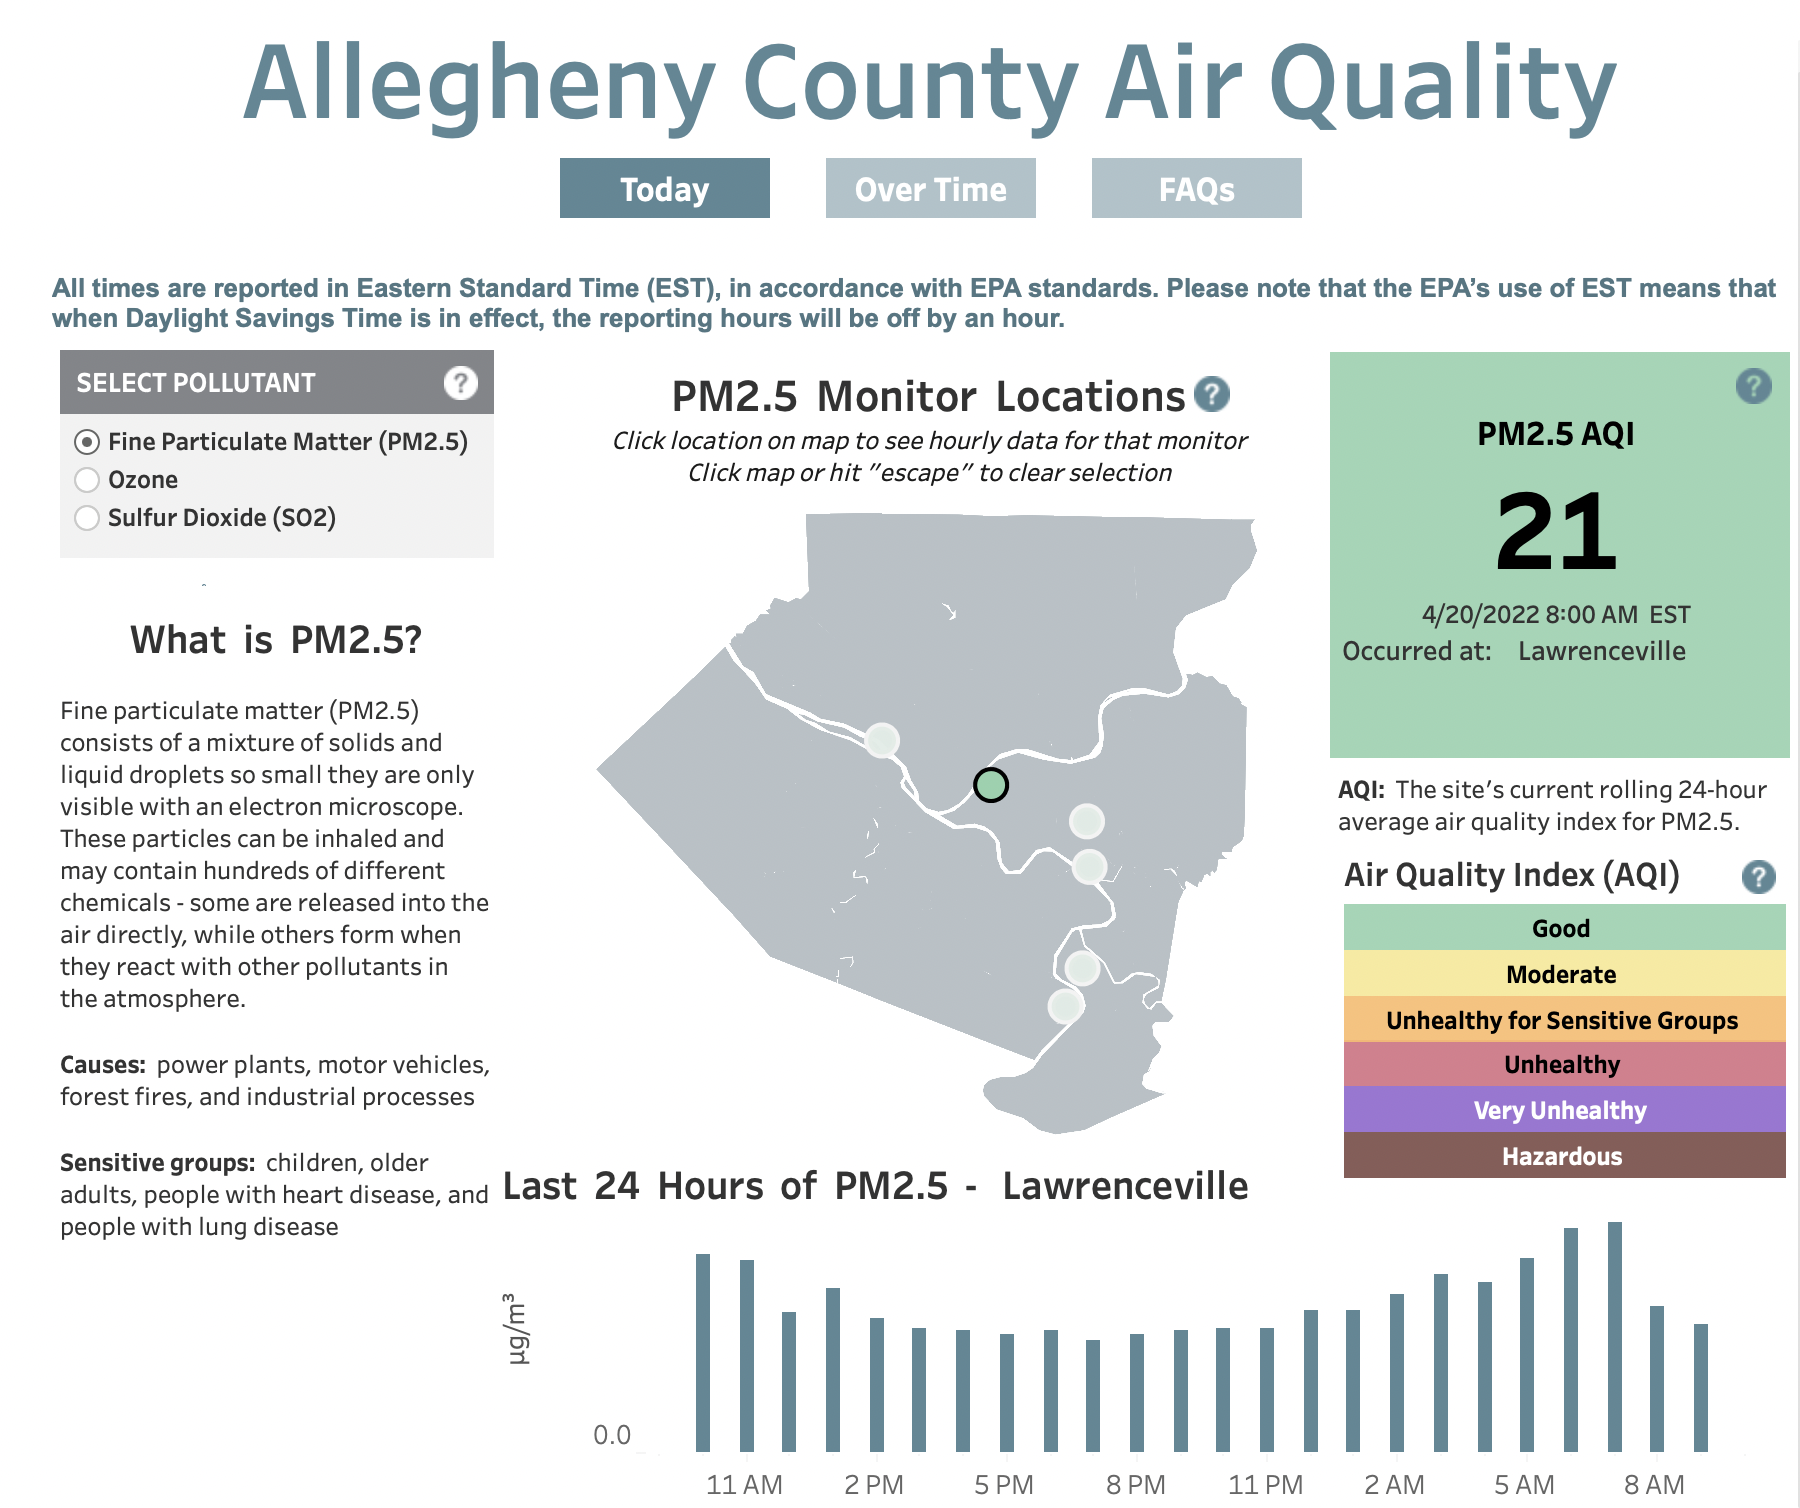

In [29]:
aqual = Image.open('aqual.png')
aqual.show()

## Transporation
Transporation from place to place is important within a neighborhood. It also factors into convenience toward the people who live there, as it allows people to conveniently go to school or work

In [23]:
tran = pd.read_csv("tran.csv")
tran.head(101)

PickID  dateKey Route RouteCode  Daily.Trip.Dist  Daily.Trip.Count  \
0     1611   201611   001         1          641.069                26   
1     1611   201611   006         6          160.656                32   
2     1611   201611   008         8          370.096                46   
3     1611   201611   011        11           70.056                18   
4     1611   201611   012        12          677.355                39   
..     ...      ...   ...       ...              ...               ...   
96    1611   201611   069        69          279.433                22   
97    1611   201611  071A       71A          559.482                84   
98    1611   201611  071B       71B          513.114                76   
99    1611   201611  071C       71C          636.696                72   
100   1611   201611  071D       71D          642.681                78   

    Day.Type.Join      Route_Full_Name Current_Garage Mode  
0            SUN.    1 - FREEPORT ROAD           Ross  Bus  
1            SUN.      6 - SPRING HILL           Ross  Bus  
2            SUN.      8 - PERRYSVILLE           Ross  Bus  
3            SUN.        11 - FINEVIEW           Ross  Bus  
4            SUN.        12 - MCKNIGHT           Ross  Bus  
..            ...                  ...            ...  ...  
96           SAT.        69 - TRAFFORD   East Liberty  Bus  
97           SAT.         71A - NEGLEY   East Liberty  Bus  
98           SAT.  71B - HIGHLAND PARK   East Liberty  Bus  
99           SAT.   71C - POINT BREEZE   East Liberty  Bus  
100          SAT.       71D - HAMILTON   East Liberty  Bus  

[101 rows x 10 columns]

In [29]:
transportation = pd.read_csv("https://data.wprdc.org/dataset/d1eb0fcd-ba60-4407-9969-ceef464d0c00/resource/1ca23fa8-53ca-43be-a7f7-82d4c7ff10f5/download/schedule_monthly_agg.csv")
transportation.groupby('Route_Full_Name')['RouteCode'].describe()

count unique  top freq
Route_Full_Name                                 
1 - FREEPORT ROAD           224      1    1  224
11 - FINEVIEW               224      1   11  224
12 - MCKNIGHT               224      1   12  224
13 - BELLEVUE               224      1   13  224
14 - OHIO VALLEY            224      1   14  224
...                         ...    ...  ...  ...
Y1 - LARGE FLYER             67      1   Y1   67
Y45 - BALDWIN MANOR FLYER    67      1  Y45   67
Y46 - ELIZABETH FLYER       224      1  Y46  224
Y47 - CURRY FLYER           134      1  Y47  134
Y49 - PROSPECT FLYER        224      1  Y49  224

[101 rows x 4 columns]

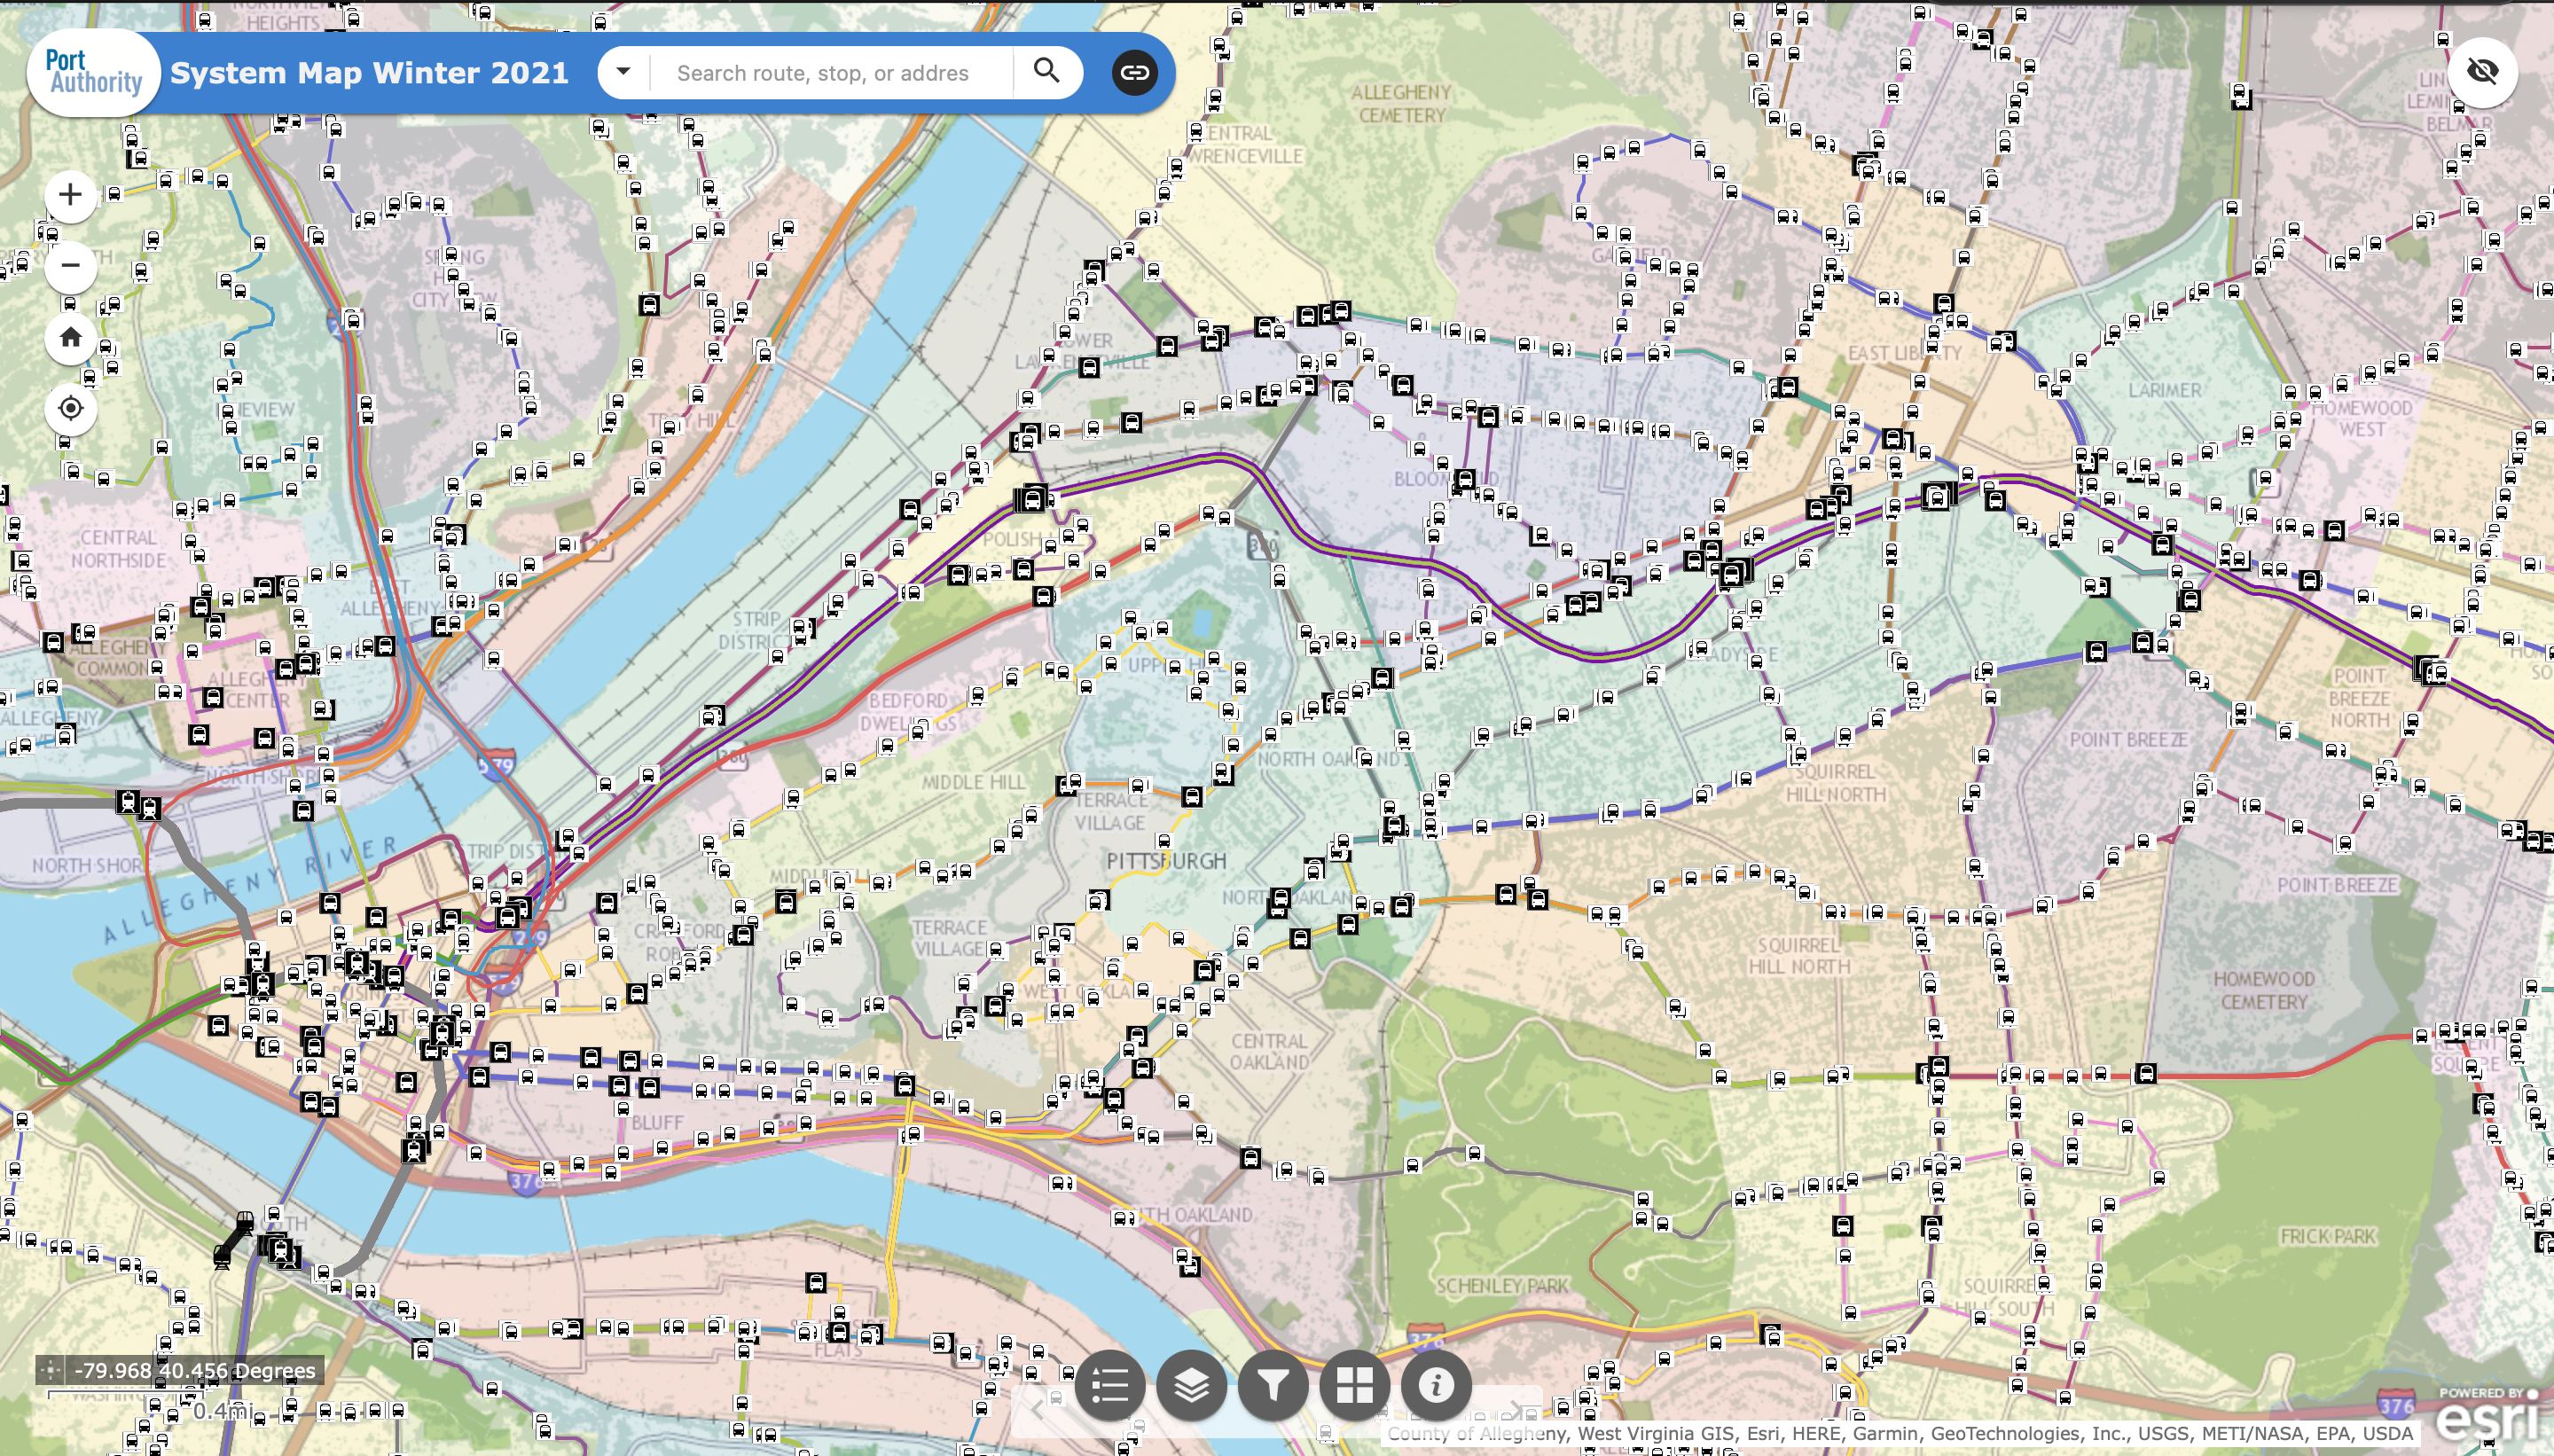

In [28]:
map = Image.open('map.png')
map.show()

## Conclusion

#### Brandon:

With all the data presented, I personally thought that the best neighborhood would contain two things, the first is transportation and the air quality in that location. So why these two types of data? First off, without convenient transportation, it would not be easy for people to get to places like work or school. In worst cases, to run away from the danger, try imaging trying to get away from a place, but have to wait 20 minutes before your Uber could come and pick you up. The second most important dataset is the air quality of a place, first off to get things clear, I was not lazy to look deeper for specific neighborhoods, but instead I just looked at the air quality of the cities. I was thinking that no matter how good the air quality is in one city, if the neighboring city has terrible air quality, then it would definitely affect the air quality of your city. So with all this data, personally, I came to a conclusion that the best neighborhood would be Downtown, Pittsburgh. Why? First, off transportation, in Downtown, there are many bus routes that stop at Downtown, and a Grey Hound Station, that allows you to go out of the city of Pittsburgh. Not only are there buses, there are also train stains, that also allows transportation around Pittsburgh. Next, the air quality, looking in as a whole, the air quality of Pittsburgh is in good condition. However, looking deeper into Downtown specifically, showing in the picture above in Air quality, the neighborhood next to Downtown has a good AQI. Which is why I chose Downtown as the best neighborhood, as it has convenient transportation and Downtown's surrounding air quality is rated good.

#### Neo:
Based on the number of guns seized by police, I found four neighborhoods with the fewest gun seizures from 2015 to 2020. According to the number of cases, there is only one case in Swisshelm Park, so by contrast, if I want to choose a place with a relatively high safety factor, I will choose Swisshelm Park. While we know there are certainly many undiscovered guns, Swisshelm Park does have the fewest such cases compared to the data.
